# Generating 1v1 Telemetry Plots

Importing the required packages:

In [30]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

Enable the cache for data, by providing the name of the cache folder:

In [31]:
ff1.Cache.enable_cache(r"C:\Users\Supraja Saravanan\Desktop\Coding Practice\Fast F1 (Python)\cache")

Key global variables:

In [32]:
year, grand_prix, session = 2023, 'Saudi Arabia', 'R'
driver_1, driver_2, driver_3 = 'PER', 'ALO', 'LEC'
lap_number = 50
race = ff1.get_session(year, grand_prix, session)
race.load(laps=True)
laps = race.load_laps(with_telemetry=True)
last_lap = laps[laps['LapNumber'] == 50]

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']
C:\Users\Supraja Saravanan\AppData\Roaming\Python\Python39\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future 

Extracting general telemetry & lap data for selected drivers:

In [33]:
#Loading lap data:
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)

#Select fastest lap:
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

#Retrieve telemetry data and add the distance column:
telemetry_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_2 = fastest_driver_2.get_telemetry().add_distance()

#Team colors:
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

#Add in delta time -- gap to other driver in seconds throughout the lap, not a very accurate estimation though:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

Generating the main plot:

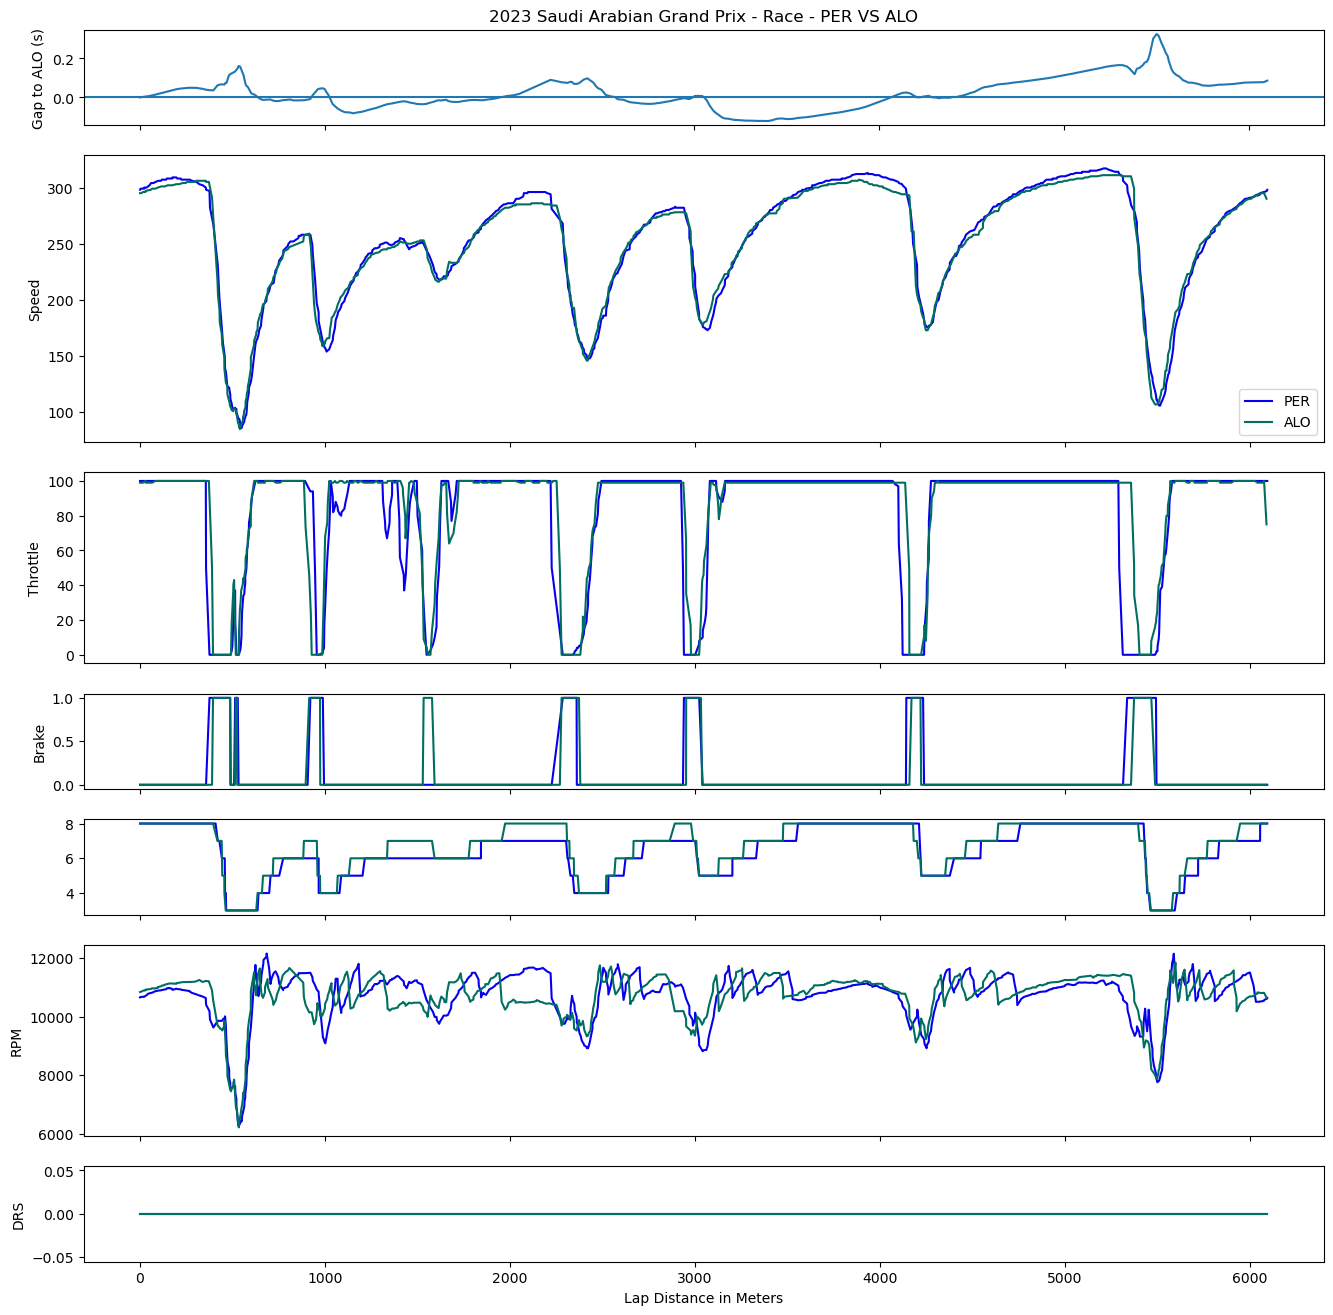

In [34]:
#Key plot variables:
plot_size = [16, 16]
plot_title = f"{race.event.year} {race.event.EventName} - {race.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + '.png'

#Generate the plot:
plt.rcParams['figure.figsize'] = plot_size

#Create subplots:
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

#Set title:
ax[0].title.set_text(plot_title)

#Delta line:
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f'Gap to {driver_2} (s)')

#Speed trace:
ax[1].plot(telemetry_1['Distance'], telemetry_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_2['Distance'], telemetry_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc='lower right')

#Throttle trace:
ax[2].plot(telemetry_1['Distance'], telemetry_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(
    team_driver_1))
ax[2].plot(telemetry_2['Distance'], telemetry_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

#Brake trace:
ax[3].plot(telemetry_1['Distance'], telemetry_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_2['Distance'], telemetry_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

#Gear trace:
ax[4].plot(telemetry_1['Distance'], telemetry_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_2['Distance'], telemetry_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].plot(ylabel='Gear')

#RPM trace:
ax[5].plot(telemetry_1['Distance'], telemetry_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_2['Distance'], telemetry_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

#DRS trace:
ax[6].plot(telemetry_1['Distance'], telemetry_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_2['Distance'], telemetry_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap Distance in Meters')

#Hide X-labels and tick labels for top plots & Y-ticks for right plots:
for a in ax.flat:
    a.label_outer()

#Store figure:
plt.savefig(plot_filename, dpi=300)
plt.show()